# Week 3: Exploratory Data Analysis (Categorical Variables)

**Sources:**

- Python for Marketing Reserach and Analytics. J. Schwarz, C. Chapman, and E.M. Feit. Springer 2020.
- Matplotlib: https://matplotlib.org
- Color Brewer: https://colorbrewer2.org/

## 3.1 Data

- The dataset records total sales by week for two competing products at a chain of stores. 
- In addition to sales, the price and promotion status were recorded. 
- The promotion status record whether the produced was promoted (1) or not (0).
- The data was collected over a period of two years.

In [59]:
import numpy as np
import pandas as pd

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns 

# set the style of the graphs to ggplot

plt.style.use('ggplot')


In [9]:
# import the dataset into python
store_sales = pd.read_csv("chapter3_data.csv")
store_sales.head()

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country
0,101.0,1.0,1.0,122.0,110.0,2.99,2.99,0,1,USA
1,101.0,1.0,2.0,160.0,79.0,2.49,3.19,0,0,USA
2,101.0,1.0,3.0,169.0,80.0,2.19,2.99,0,0,USA
3,101.0,1.0,4.0,119.0,102.0,2.49,2.49,0,0,USA
4,101.0,1.0,5.0,114.0,143.0,2.49,2.59,0,1,USA


In [64]:
type(store_sales)

pandas.core.frame.DataFrame

## 3.2 Data Aggregation Tool: the `groupby()` method

- Used to break out data into groups 
- We break down the data to look at groups similar on one or more dimensions
- Usually the purpose of breaking down the data is to describe each group of data using summary statistics (count, mean, median, std, etc)

In [8]:
# groupby() is a DataFrame method
# returns a SeriesGroupBy object which can be saved to a variable
# the following code is grouping obervations by store_num

store_sales.groupby('store_num')

In [11]:
# note that the object returned by groupby has all the columns in the orginal dataframe
# we can access a column in the SeriesGroupby object using the dot notation
# and once we access the specific column then we can produce any summary statistic such as mean
# The following gives us the mean of p1 sales for each of the 20 stores we have

store_sales.groupby('store_num').p1_sales.mean()

store_num
101.0    133.500000
102.0    138.807692
103.0    132.682692
104.0    131.798077
105.0    135.480769
106.0    136.057692
107.0    138.980769
108.0    133.865385
109.0    134.096154
110.0    134.653846
111.0    134.278846
112.0    133.000000
113.0    134.855769
114.0    128.211538
115.0    130.923077
116.0    132.576923
117.0    135.375000
118.0    134.423077
119.0    132.336538
120.0    133.451923
Name: p1_sales, dtype: float64

In [22]:
# we can group by more than one factor
# we pass the multiple grouping factors as a list 
store_sales.groupby(['store_num', 'year']).p1_sales.mean()


store_num  year
101.0      1.0     132.538462
           2.0     134.461538
102.0      1.0     139.692308
           2.0     137.923077
103.0      1.0     130.557692
           2.0     134.807692
104.0      1.0     127.653846
           2.0     135.942308
105.0      1.0     136.000000
           2.0     134.961538
106.0      1.0     135.653846
           2.0     136.461538
107.0      1.0     139.615385
           2.0     138.346154
108.0      1.0     136.230769
           2.0     131.500000
109.0      1.0     130.557692
           2.0     137.634615
110.0      1.0     130.961538
           2.0     138.346154
111.0      1.0     136.461538
           2.0     132.096154
112.0      1.0     130.500000
           2.0     135.500000
113.0      1.0     135.384615
           2.0     134.326923
114.0      1.0     124.519231
           2.0     131.903846
115.0      1.0     130.788462
           2.0     131.057692
116.0      1.0     132.884615
           2.0     132.269231
117.0      1.0     134.1

In [23]:
type(store_sales.groupby(['store_num', 'year']).p1_sales.mean())

pandas.core.series.Series

In [ ]:
# A limitation for Groupby() is that the output from grouping by multiple factors is 
# not structured for reuse (not a regular dataframe)

# to solve this issue, we can use the unstack() method as follows
# the unstack() method pivot the indicies and returns a nicely formatted dataframe



In [24]:
store_sales.groupby(['store_num', 'year']).p1_sales.mean().unstack()

year,1.0,2.0
store_num,,
101.0,132.538462,134.461538
102.0,139.692308,137.923077
103.0,130.557692,134.807692
104.0,127.653846,135.942308
105.0,136.000000,134.961538
106.0,135.653846,136.461538
107.0,139.615385,138.346154
108.0,136.230769,131.500000
109.0,130.557692,137.634615


In [25]:
# here is another example to find the total sales for p1 across different countries
store_sales.groupby('country').p1_sales.sum()


country
AUS    13980.0
BRA    27857.0
CHN    27642.0
DEU    70323.0
GBR    41915.0
JPN    54817.0
USA    42119.0
Name: p1_sales, dtype: float64

In [ ]:
#here is another example to find total sacles for p1 across different countries and year
yearly_sales=store_sales.groupby(['country', 'year']).p1_sales.sum().unstack()
yearly_sales

## 3.3 Distribution of One Categorical (Discrete) Variables

- We use **frequency tables** and **relative frequency tables** to decribe discrete (categorical) data
- The method value_counts() is a pandas method that helps us create such table

### 3.3.1 Fequency Tables

In [28]:
# notice here that we have 5 price levels
# by default the value_counts created a sorted output

store_sales.country.value_counts()
# store_sales['country'].value_counts()

DEU    520
JPN    416
USA    312
GBR    312
BRA    208
CHN    208
AUS    104
Name: country, dtype: int64

In [31]:
# note that we can use groupby to find the count as follows using the count() method
store_sales.groupby('country').country.count()

country
AUS    104
BRA    208
CHN    208
DEU    520
GBR    312
JPN    416
USA    312
Name: country, dtype: int64

In [32]:
# notice here that we have 5 price levels
# eventhough price is a numerical value, but here we can consider it categorical since
# it has five unique values as shown below 

store_sales.p1_price.value_counts()


2.29    420
2.19    417
2.49    416
2.99    415
2.79    412
Name: p1_price, dtype: int64

### 3.3.2 Relative Frequency Table

In [36]:
len(store_sales) # number of observations in a dataframe

2080

In [38]:
store_sales.shape

(2080, 10)

In [39]:
store_sales.shape[0] # number of obs

2080

In [41]:
store_sales.country.value_counts()/len(store_sales)

DEU    0.25
JPN    0.20
USA    0.15
GBR    0.15
BRA    0.10
CHN    0.10
AUS    0.05
Name: country, dtype: float64

In [42]:
# relative frequency table
store_sales.country.value_counts(normalize=True)*100

DEU    25.0
JPN    20.0
USA    15.0
GBR    15.0
BRA    10.0
CHN    10.0
AUS     5.0
Name: country, dtype: float64

In [ ]:
# we can show them in percentages by multiplying the output vector by 100
# notice that this is allowed in Pandas since it supports vectorized operations


## 3.4 Visual Distribution of One Categorical Data

### 3.4.1 Barchart

In [49]:
# we can always store our output in a variable that we can act upon later

country_sales = store_sales.country.value_counts()
country_sales

DEU    520
JPN    416
USA    312
GBR    312
BRA    208
CHN    208
AUS    104
Name: country, dtype: int64

In [57]:
type(country_sales)

pandas.core.series.Series

Text(0.5, 1.0, 'I am a title')

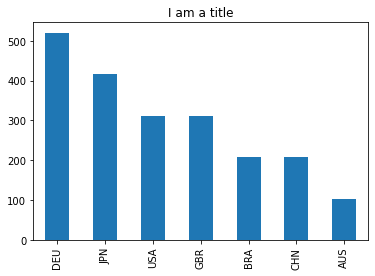

In [58]:
country_sales.plot.bar()
plt.title('I am a title')

In [ ]:
#another example
yearly_sales.plot.bar()

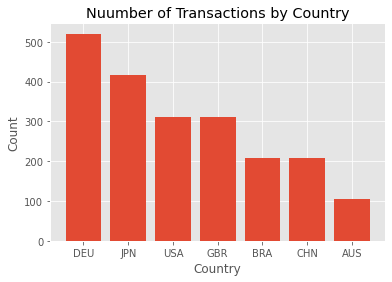

In [60]:
# for example, we can use plot method on country_sales to show the distribution of sales transactions by country
# the plot.bar() method is Pandas method that acts on a Pandas DataFrame to pro

plt.bar(country_sales.index, country_sales)
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Count')

plt.show()

**DIY**: Visualize the average sales for product 1 by country. 


<BarContainer object of 7 artists>

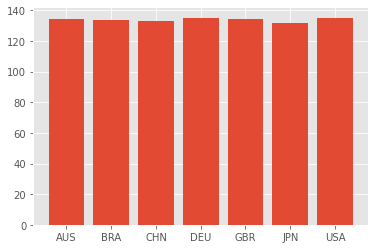

In [72]:
avg_sales = store_sales.groupby('country').p1_sales.mean()

plt.bar(avg_sales.index, avg_sales)

### 3.4.3 Horizontal barcharts 

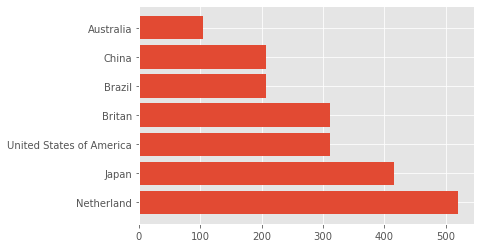

In [75]:
# We can create a horizontal barchart using the barh() method that comes with 

country_sales = store_sales.country.value_counts()
country_sales

plt.barh(country_sales.index, country_sales)

# update the tick labels on the y-axis 
# 1. initialize a list of new lables
# 2. use the plt.yticks() method to update the labels

y_ticklabels = ['Netherland', 'Japan', 'United States of America', 'Britan', 'Brazil', 
                'China', 'Australia']

plt.yticks(range(7), y_ticklabels)

plt.show()

### 3.4.4 Barcharts with text to show value

- We can also add labels to the bars to show the value for each bar

In [ ]:


# v: value from a Series
# i: index from a Series 

# in the following code, we are iterating over all the barlabels
# use the v and i as the coordinate for which the text shows up
# show the v value from the Series



### 3.4.5 Treemap

Note on installing pip: https://www.geeksforgeeks.org/download-and-install-pip-latest-version/

(0.0, 100.0, 0.0, 100.0)

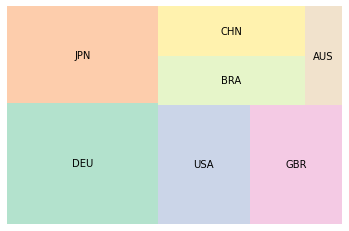

In [82]:
# pip install squarify 
# you might need to install pip to run this command
# Color Brewer: https://colorbrewer2.org/

import squarify
import matplotlib

color_map = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4','#e6f5c9','#fff2ae','#f1e2cc']

squarify.plot(sizes=country_sales, label = country_sales.index, color = color_map)

plt.axis('off')

### 3.4.6 Lollipop plot

- For more references on plot Style: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [89]:
country_sales

DEU    520
JPN    416
USA    312
GBR    312
BRA    208
CHN    208
AUS    104
Name: country, dtype: int64

In [92]:
['orange' if i== 2 else 'skyblue' for i,v in enumerate(country_sales)]

['skyblue', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue', 'skyblue']

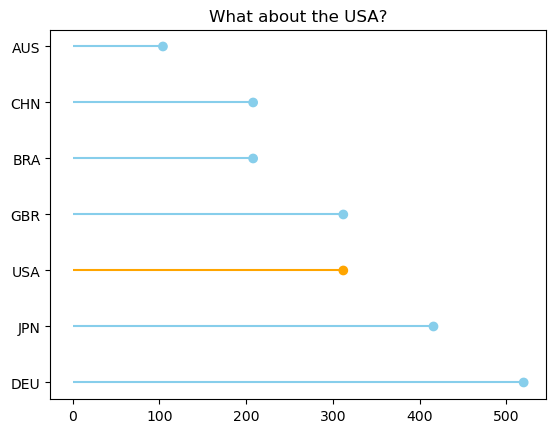

In [96]:
mycolors = ['orange' if i== 2 else 'skyblue' for i,v in enumerate(country_sales)]

plt.style.use('default')
plt.hlines(y = country_sales.index, xmin = 0, xmax = country_sales, color = mycolors)
plt.scatter(country_sales, country_sales.index, color = mycolors)
plt.title('What about the USA?')

plt.show()

### 3.4.7 Why to **AVOID** using Pie charts

- It is really hard to compare different groups/categories compared to a barchart or a lollipo chart
- Humans are really bad at reading angles
- For more on this topic: https://www.data-to-viz.com/caveat/pie.html

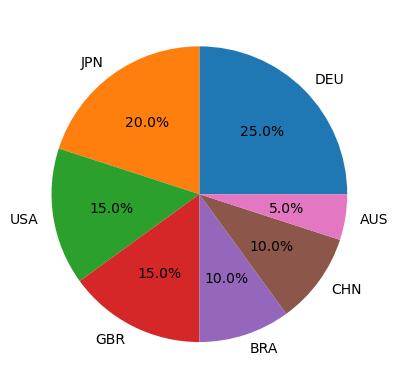

In [105]:
# %.1f stands for "print a float with 1 decimal places"
# %% prints literal %

plt.pie(country_sales, labels= country_sales.index, autopct= '%.1f%%')
plt.show()
